In [1]:
# pip install pandas yfinance

## Key Metrics for Evaluating Dividend Stocks

1. **Dividend Yield**
   - **Definition**: Measures the annual dividend payment as a percentage of the stock’s price.
   - **What to Look For**: A higher yield can be attractive, but ensure it’s sustainable and not excessively high due to a falling stock price.

2. **Dividend Payout Ratio**
   - **Definition**: The percentage of earnings paid out as dividends.
   - **Calculation**: 
     \[
     \text{Payout Ratio} = \frac{\text{Dividends Per Share}}{\text{Earnings Per Share}} \times 100
     \]
   - **What to Look For**: A lower ratio indicates a company retains more earnings for growth and stability. A high payout ratio might be risky if earnings fluctuate.

3. **Dividend Growth Rate**
   - **Definition**: The annualized percentage growth rate of dividends over a period.
   - **What to Look For**: Consistent and steady growth in dividends suggests a reliable and stable company.

4. **Dividend Stability**
   - **Definition**: Consistency in paying dividends over time.
   - **What to Look For**: Look for companies with a history of paying dividends through various economic conditions. Companies that have consistently paid dividends for many years are often considered more reliable.

5. **Free Cash Flow**
   - **Definition**: Cash generated by the company after accounting for capital expenditures.
   - **Calculation**: 
     \[
     \text{Free Cash Flow} = \text{Operating Cash Flow} - \text{Capital Expenditures}
     \]
   - **What to Look For**: Positive free cash flow is crucial as it indicates the company has enough cash to cover dividend payments and fund growth.

6. **Earnings Growth**
   - **Definition**: The rate at which a company’s earnings are increasing over time.
   - **What to Look For**: Strong earnings growth can support higher future dividends and indicate overall business health.

7. **Return on Equity (ROE)**
   - **Definition**: Measures a company’s profitability relative to shareholders' equity.
   - **Calculation**: 
     \[
     \text{ROE} = \frac{\text{Net Income}}{\text{Shareholders' Equity}} \times 100
     \]
   - **What to Look For**: A higher ROE indicates effective management and a potentially profitable investment.

8. **Debt-to-Equity Ratio**
   - **Definition**: Compares a company’s total liabilities to its shareholders' equity.
   - **Calculation**: 
     \[
     \text{Debt-to-Equity Ratio} = \frac{\text{Total Liabilities}}{\text{Shareholders' Equity}}
     \]
   - **What to Look For**: A lower ratio indicates lower financial risk. High debt levels can put pressure on dividends, especially during economic downturns.

9. **Interest Coverage Ratio**
   - **Definition**: Measures a company’s ability to pay interest on its debt.
   - **Calculation**: 
     \[
     \text{Interest Coverage Ratio} = \frac{\text{Earnings Before Interest and Taxes (EBIT)}}{\text{Interest Expense}}
     \]
   - **What to Look For**: A higher ratio suggests the company can easily meet its interest obligations, which is beneficial for maintaining dividends.

10. **Dividend Aristocrats and Dividend Kings**
    - **Definition**: Companies with a long history of increasing dividends.
    - **What to Look For**: Dividend Aristocrats have increased dividends for at least 25 consecutive years, and Dividend Kings have done so for at least 50 years.

11. **Market Conditions and Company Outlook**
    - **Definition**: Evaluate the company’s market position, industry conditions, and future growth prospects.
    - **What to Look For**: Understand the broader economic environment and industry trends that could impact the company's ability to maintain or grow its dividend.

12. **Historical Performance and Valuation**
    - **Definition**: Assess historical dividend payments and stock performance.
    - **What to Look For**: Ensure that past performance aligns with your investment goals and that the stock is reasonably valued compared to its historical averages.


2024-08-17 13:52:08,386 - INFO - Fetching data for tickers: ['PKN.WA', 'PEO.WA', 'PZU.WA', 'PLW.WA', 'ING.WA', 'DOM.WA', 'SPL.WA']
2024-08-17 13:52:13,202 - INFO - Plotting data


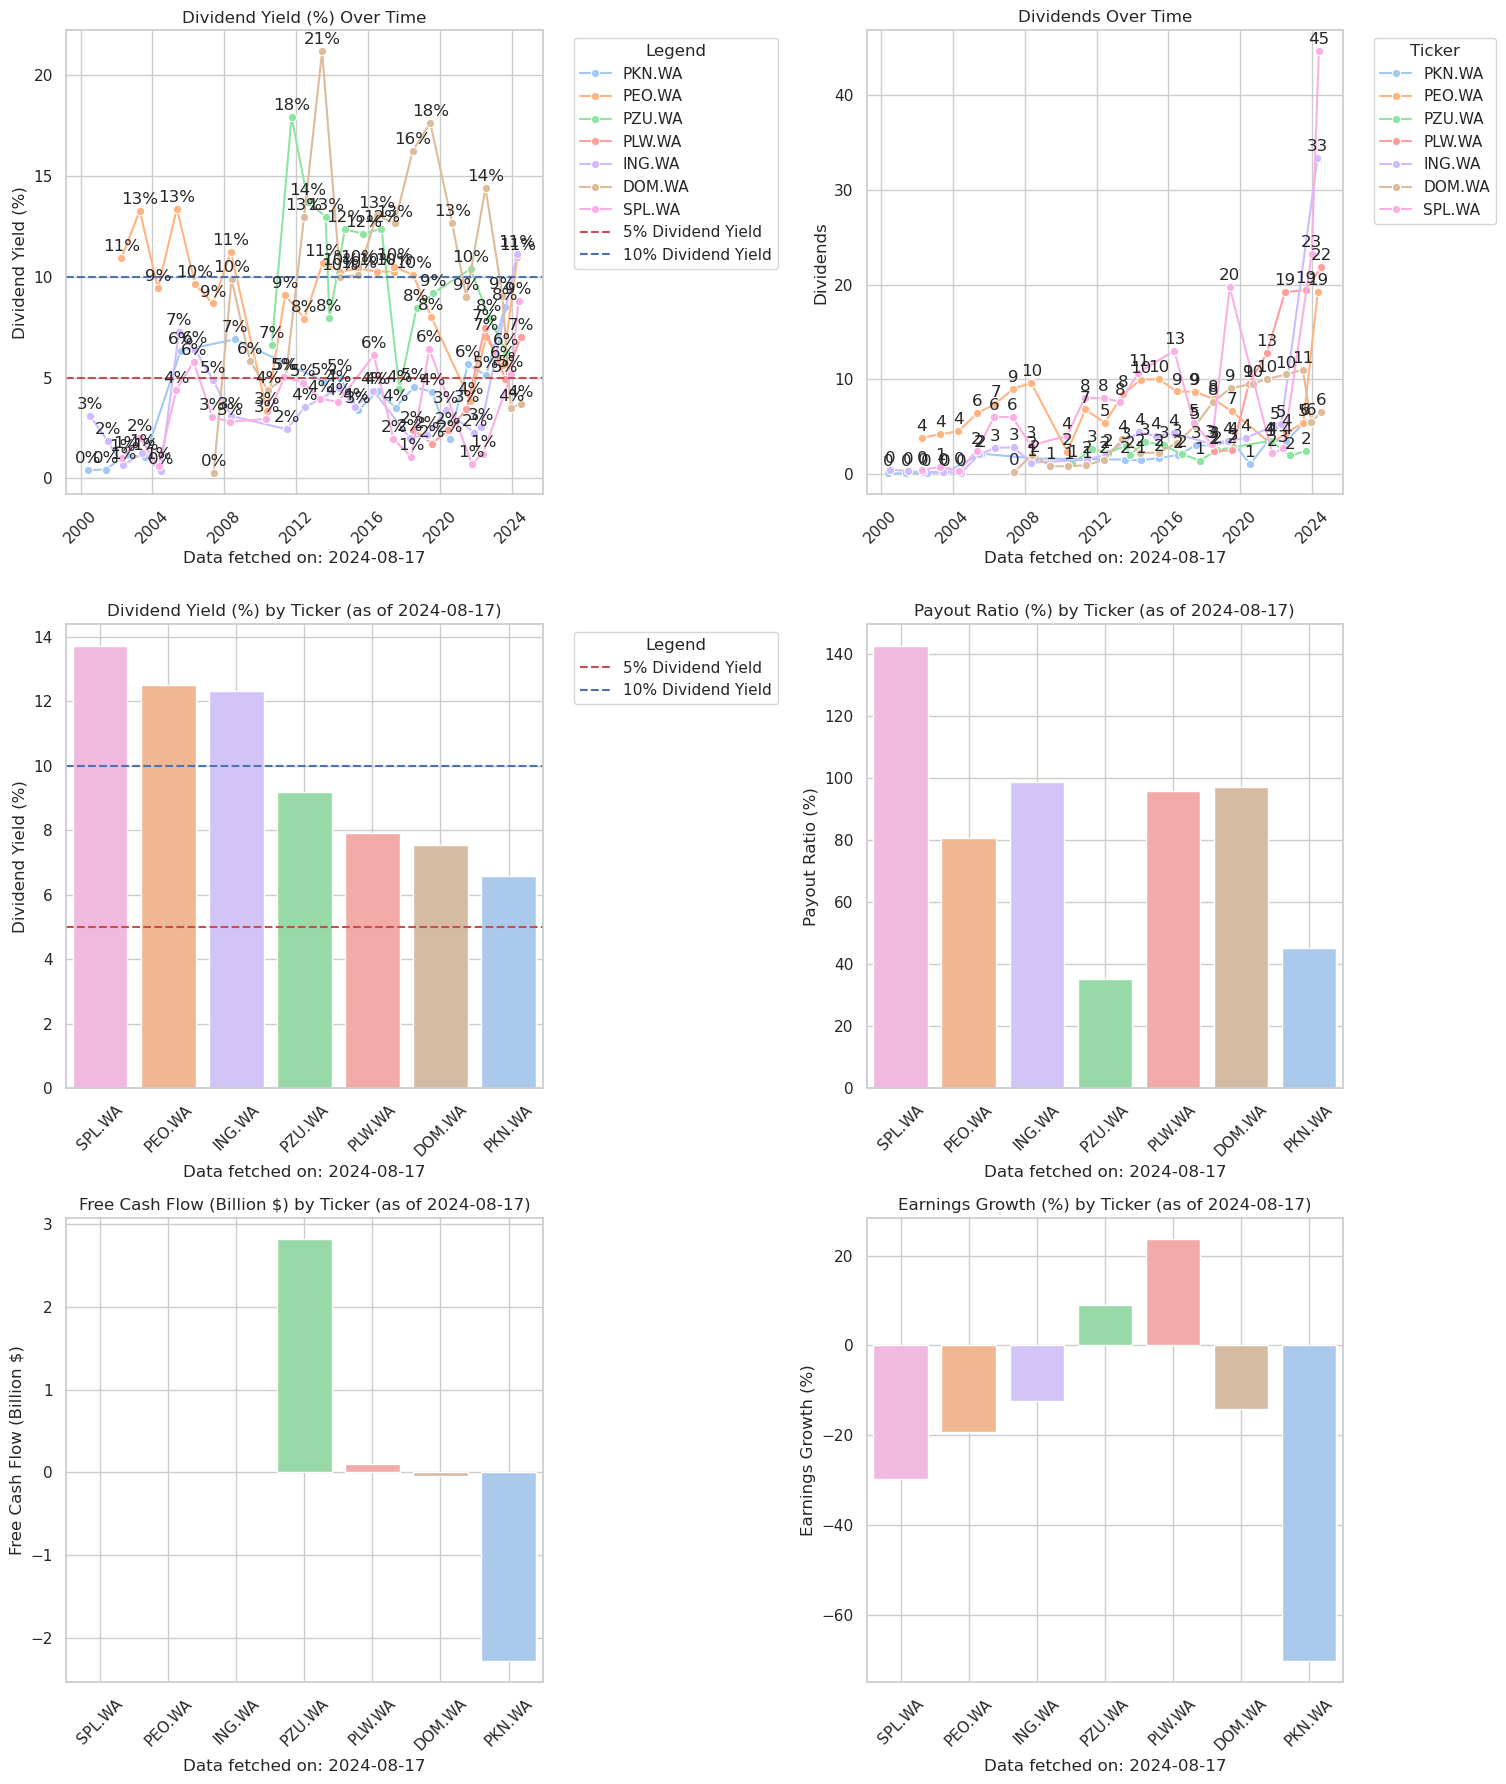

2024-08-17 13:52:16,507 - INFO - Displaying data


    Ticker          Ex-Dividend Date  Dividends       Close  \
19  SPL.WA 2024-05-15 00:00:00+02:00      44.63  506.399994   
18  SPL.WA 2023-12-21 00:00:00+01:00      23.25  448.573059   
17  SPL.WA 2022-05-24 00:00:00+02:00       2.68  219.696960   
16  SPL.WA 2021-10-07 00:00:00+02:00       2.16  293.376526   
15  SPL.WA 2019-05-29 00:00:00+02:00      19.72  307.472992   
14  SPL.WA 2018-05-29 00:00:00+02:00       3.10  289.005829   
13  SPL.WA 2017-05-30 00:00:00+02:00       5.40  279.390686   
12  SPL.WA 2016-04-28 00:00:00+02:00      13.00  212.965637   
11  SPL.WA 2014-04-29 00:00:00+02:00      10.70  282.002899   
10  SPL.WA 2013-04-29 00:00:00+02:00       7.60  192.194656   
9   SPL.WA 2012-05-22 00:00:00+02:00       8.00  168.516968   
8   SPL.WA 2011-05-05 00:00:00+02:00       8.00  159.567902   
7   SPL.WA 2010-05-05 00:00:00+02:00       4.00  135.438492   
6   SPL.WA 2008-04-30 00:00:00+02:00       3.00  106.874252   
5   SPL.WA 2007-04-30 00:00:00+02:00       6.00  196.92

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import logging
from typing import List, Dict

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class WIGCompanyAnalysis:
    def __init__(self, tickers: List[str], palette_name: str = "husl") -> None:
        self.tickers = tickers
        self.palette_name = palette_name
        self.dividend_yields_df = pd.DataFrame()
        self.metrics_df = pd.DataFrame()
        self.data_fetch_date = datetime.now().strftime('%Y-%m-%d')
    
    def fetch_data(self) -> None:
        logging.info('Fetching data for tickers: %s', self.tickers)
        for ticker in self.tickers:
            try:
                stock = yf.Ticker(ticker)
                self._process_dividend_data(stock, ticker)
                self._process_metrics_data(stock, ticker)
            except Exception as e:
                logging.error('Error fetching data for %s: %s', ticker, e)

    def _process_dividend_data(self, stock: yf.Ticker, ticker: str) -> None:
        # Get the historical dividend data
        dividends = stock.dividends.reset_index()
        dividends['Ex-Dividend Date'] = dividends['Date']
        
        # Get historical stock prices
        prices = stock.history(period="max")['Close'].reset_index()
        
        # Merge dividends with the price data
        dividends = pd.merge(dividends, prices, left_on='Ex-Dividend Date', right_on='Date', how='left')
        
        # Calculate dividend yield in percentage
        dividends['Dividend Yield (%)'] = (dividends['Dividends'] / dividends['Close']) * 100
        dividends['Ticker'] = ticker
        
        # Select relevant columns
        dividends = dividends[
            [
                'Ticker',
                'Ex-Dividend Date',
                'Dividends',
                'Close',
                'Dividend Yield (%)',
            ]
        ]
        
        # Append to the main DataFrame
        self.dividend_yields_df = pd.concat([self.dividend_yields_df, dividends])

    def _process_metrics_data(self, stock: yf.Ticker, ticker: str) -> None:
        # Fetch additional financial data
        info = stock.info
        
        # Calculate metrics and store in DataFrame
        metrics = {
            'Ticker': ticker,
            'Dividend Yield (%)': info.get('dividendYield', float('nan')) * 100,
            'Payout Ratio (%)': info.get('payoutRatio', float('nan')) * 100,
            'Free Cash Flow (Billion $)': info.get('freeCashflow', float('nan')) / 1e9,
            'Earnings Growth (%)': info.get('earningsGrowth', float('nan')) * 100,
            'ROE (%)': info.get('returnOnEquity', float('nan')) * 100,
            'Debt-to-Equity Ratio': info.get('debtToEquity', float('nan')),
            'Interest Coverage Ratio': info.get('interestCoverage', float('nan')),
        }
        
        self.metrics_df = pd.concat([self.metrics_df, pd.DataFrame([metrics])], ignore_index=True)

    def plot_data(self) -> None:
        logging.info('Plotting data')
        sns.set(style="whitegrid")
        fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharex=False)

        # Get the color palette based on the selected palette name
        palette = sns.color_palette(self.palette_name, len(self.tickers))
        color_map = dict(zip(self.tickers, palette))
        
        # Sort metrics_df by Dividend Yield in descending order for the bar chart
        sorted_metrics_df = self.metrics_df.sort_values(by='Dividend Yield (%)', ascending=False)

        # Plot Dividend Yield (%) over time for each ticker
        sns.lineplot(ax=axes[0, 0], data=self.dividend_yields_df, x="Ex-Dividend Date", y="Dividend Yield (%)", hue="Ticker", palette=color_map, marker="o")
        axes[0, 0].set_title("Dividend Yield (%) Over Time")
        axes[0, 0].set_ylabel("Dividend Yield (%)")
        axes[0, 0].axhline(y=5, color='r', linestyle='--', label='5% Dividend Yield')
        axes[0, 0].axhline(y=10, color='b', linestyle='--', label='10% Dividend Yield')
        axes[0, 0].legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[0, 0].grid(True)
        axes[0, 0].set_xlabel(f"Data fetched on: {self.data_fetch_date}")

        # Annotate data points with rounded dividend yield percentages
        for _, row in self.dividend_yields_df.iterrows():
            if pd.notna(row['Dividend Yield (%)']):
                axes[0, 0].annotate(f"{round(row['Dividend Yield (%)'])}%",
                                    (row['Ex-Dividend Date'], row['Dividend Yield (%)']),
                                    textcoords="offset points",
                                    xytext=(0, 5),
                                    ha='center')

        # Plot Dividends over time for each ticker
        sns.lineplot(ax=axes[0, 1], data=self.dividend_yields_df, x="Ex-Dividend Date", y="Dividends", hue="Ticker", palette=color_map, marker="o")
        axes[0, 1].set_title("Dividends Over Time")
        axes[0, 1].set_ylabel("Dividends")
        axes[0, 1].legend(title="Ticker", bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[0, 1].grid(True)
        axes[0, 1].set_xlabel(f"Data fetched on: {self.data_fetch_date}")

        # Annotate data points with rounded dividend amounts
        for _, row in self.dividend_yields_df.iterrows():
            if pd.notna(row['Dividends']):
                axes[0, 1].annotate(f"{round(row['Dividends'])}",
                                    (row['Ex-Dividend Date'], row['Dividends']),
                                    textcoords="offset points",
                                    xytext=(0, 5),
                                    ha='center')

        # Plot Dividend Yield (%) by Ticker
        sns.barplot(ax=axes[1, 0], data=sorted_metrics_df, x='Ticker', y='Dividend Yield (%)', hue='Ticker', palette=color_map)
        axes[1, 0].set_title("Dividend Yield (%) by Ticker")
        axes[1, 0].set_ylabel("Dividend Yield (%)")
        axes[1, 0].set_xlabel(f"Data fetched on: {self.data_fetch_date}")

        # Add horizontal lines for 5% and 10% Dividend Yield
        axes[1, 0].axhline(y=5, color='r', linestyle='--', label='5% Dividend Yield')
        axes[1, 0].axhline(y=10, color='b', linestyle='--', label='10% Dividend Yield')
        axes[1, 0].legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

        axes[1, 0].grid(True)
        axes[1, 0].set_title(f"Dividend Yield (%) by Ticker (as of {self.data_fetch_date})")

        # Plot Payout Ratio by Ticker (sorted by Dividend Yield order)
        sns.barplot(ax=axes[1, 1], data=sorted_metrics_df, x='Ticker', y='Payout Ratio (%)', hue='Ticker', palette=color_map)
        axes[1, 1].set_title("Payout Ratio (%) by Ticker")
        axes[1, 1].set_ylabel("Payout Ratio (%)")
        axes[1, 1].set_xlabel(f"Data fetched on: {self.data_fetch_date}")
        axes[1, 1].grid(True)
        axes[1, 1].set_title(f"Payout Ratio (%) by Ticker (as of {self.data_fetch_date})")

        # Plot Free Cash Flow by Ticker (sorted by Dividend Yield order)
        sns.barplot(ax=axes[2, 0], data=sorted_metrics_df, x='Ticker', y='Free Cash Flow (Billion $)', hue='Ticker', palette=color_map)
        axes[2, 0].set_title("Free Cash Flow (Billion $) by Ticker")
        axes[2, 0].set_ylabel("Free Cash Flow (Billion $)")
        axes[2, 0].set_xlabel(f"Data fetched on: {self.data_fetch_date}")
        axes[2, 0].grid(True)
        axes[2, 0].set_title(f"Free Cash Flow (Billion $) by Ticker (as of {self.data_fetch_date})")

        # Plot Earnings Growth by Ticker (sorted by Dividend Yield order)
        sns.barplot(ax=axes[2, 1], data=sorted_metrics_df, x='Ticker', y='Earnings Growth (%)', hue='Ticker', palette=color_map)
        axes[2, 1].set_title("Earnings Growth (%) by Ticker")
        axes[2, 1].set_ylabel("Earnings Growth (%)")
        axes[2, 1].set_xlabel(f"Data fetched on: {self.data_fetch_date}")
        axes[2, 1].grid(True)
        axes[2, 1].set_title(f"Earnings Growth (%) by Ticker (as of {self.data_fetch_date})")

        # Rotate x-axis labels for better readability
        for ax in axes.flatten():
            plt.setp(ax.get_xticklabels(), rotation=45)

        plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legends
        plt.show()

    def display_data(self) -> None:
        logging.info('Displaying data')
        print(self.dividend_yields_df.tail(20).iloc[::-1])
        print(self.metrics_df)

if __name__ == "__main__":
    # List of WIG companies' ticker symbols
    wig_tickers = [
        "PKN.WA",  # ORLEN SA (PKN)
        "PEO.WA",  # Bank Polska Kasa Opieki SA (PEO)
        "PZU.WA",  # Powszechny Zakład Ubezpieczeń SA (PZU)
        "PLW.WA",  # PlayWay SA (PLW)
        "ING.WA",  # ING Bank Śląski SA (ING)
        "DOM.WA",  # Bank Polska Kasa Opieki SA (PEO)
        "SPL.WA"  # Santander Bank Polska SA (SPL)
    ]

    # Color palette selection
    palette_name = "pastel"  # Choose from 'deep', 'colorblind', 'viridis', 'pastel', 'husl', etc.

    analysis = WIGCompanyAnalysis(tickers=wig_tickers, palette_name=palette_name)
    analysis.fetch_data()
    analysis.plot_data()
    analysis.display_data()
